In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/income.csv")

In [ ]:
X = df.drop(columns=["income_level"])
y = df["income_level"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_10 = AdaBoostClassifier(n_estimators=10, random_state=42)
model_10.fit(X_train, y_train)
y_pred_10 = model_10.predict(X_test)
score_10 = accuracy_score(y_test, y_pred_10)

In [ ]:
print(f"Accuracy with 10 estimators: {score_10:.4f}")

Accuracy with 10 estimators: 0.8182


In [ ]:
estimator_range = range(10, 201, 10)
scores = []

for n in estimator_range:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [ ]:
best_score = max(scores)
best_n_estimators = estimator_range[scores.index(best_score)]

print(f"\nBest accuracy: {best_score:.4f} with {best_n_estimators} estimators")



Best accuracy: 0.8335 with 80 estimators


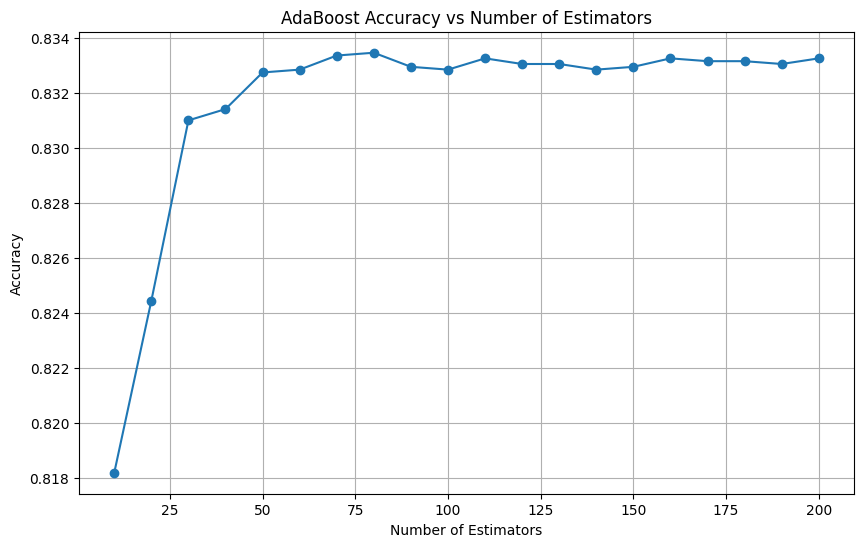

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, scores, marker='o')
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
best_model = AdaBoostClassifier(n_estimators=best_n_estimators, random_state=42)
best_model.fit(X_train, y_train)
best_preds = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, best_preds)

In [ ]:
print(f"\nConfusion Matrix for {best_n_estimators} estimators:\n{conf_matrix}")


Confusion Matrix for 80 estimators:
[[7130  284]
 [1343 1012]]
